
####  Классификация fetch_20newsgroups SVM методами 


LinearSVC - реализация SVM с линейным ядром для задач классификации

LinearSVR - реализация SVM с линейным ядром для задач регрессии

SVC - наиболее общая реализация SVM для задач классификации

SVR - наиболее общая реализация SVM для задач регрессии

NuSVC - реализация SVM для задач классификации с возможностью задать количество опорных векторов

NuSVR - реализация SVM для задач регрессии с возможностью задать количество опорных векторов

OneClassSVM - реализация SVM для задачи обнаружения отклонений без учителя

In [2]:
import numpy as np, numpy
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import pylab as plt
import pylab as plot
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
%matplotlib inline 

import nltk
import re

from numpy import linalg as LA

from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVR
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.svm import NuSVC
from sklearn.svm import NuSVR
from sklearn.svm import OneClassSVM

from joblib import dump, load

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics.cluster import v_measure_score


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.datasets import load_files
from sklearn.datasets import fetch_20newsgroups

In [3]:
fetch_20newsgroups

<function sklearn.datasets.twenty_newsgroups.fetch_20newsgroups(data_home=None, subset='train', categories=None, shuffle=True, random_state=42, remove=(), download_if_missing=True)>

In [4]:
newsgroups_train = fetch_20newsgroups(subset='train')

In [5]:
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
newsgroups_train.data[3]

'From: jgreen@amber (Joe Green)\nSubject: Re: Weitek P9000 ?\nOrganization: Harris Computer Systems Division\nLines: 14\nDistribution: world\nNNTP-Posting-Host: amber.ssd.csd.harris.com\nX-Newsreader: TIN [version 1.1 PL9]\n\nRobert J.C. Kyanko (rob@rjck.UUCP) wrote:\n> abraxis@iastate.edu writes in article <abraxis.734340159@class1.iastate.edu>:\n> > Anyone know about the Weitek P9000 graphics chip?\n> As far as the low-level stuff goes, it looks pretty nice.  It\'s got this\n> quadrilateral fill command that requires just the four points.\n\nDo you have Weitek\'s address/phone number?  I\'d like to get some information\nabout this chip.\n\n--\nJoe Green\t\t\t\tHarris Corporation\njgreen@csd.harris.com\t\t\tComputer Systems Division\n"The only thing that really scares me is a person with no sense of humor."\n\t\t\t\t\t\t-- Jonathan Winters\n'

In [91]:
categories_2 = ['alt.atheism', 
                'sci.med'
               ]
categories_4 = ['alt.atheism', 
                'soc.religion.christian',
                'comp.graphics',
                'sci.med'
               ]
categories_5 = ['comp.graphics',
                'comp.os.ms-windows.misc',
                'comp.sys.ibm.pc.hardware',
                'comp.sys.mac.hardware',
                'comp.windows.x'
               ]   
categories_6 = ['comp.graphics',
                'comp.os.ms-windows.misc',
                'comp.sys.ibm.pc.hardware',
                'comp.sys.mac.hardware',
                'comp.windows.x',
                'rec.sport.baseball'
               ]
two_train = fetch_20newsgroups(subset='train',
    categories=categories_2, shuffle=True, random_state=42)
four_train = fetch_20newsgroups(subset='train',
    categories=categories_4, shuffle=True, random_state=42)
five_train = fetch_20newsgroups(subset='train',
    categories=categories_5, shuffle=True, random_state=42)
six_train = fetch_20newsgroups(subset='train',
    categories=categories_6, shuffle=True, random_state=42)
twenty_train = fetch_20newsgroups(subset='train',
    categories=None, shuffle=True, random_state=42)

In [77]:
# функция преобразования текста:
def data_X_y(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    cv = CountVectorizer()
    cv.fit(X_train)
    X_train = cv.transform(X_train)
    X_test = cv.transform(X_test)

    tfidf_transformer = TfidfTransformer()
    X_train_tfidf = tfidf_transformer.fit_transform(X_train)
    X_test_tfidf = tfidf_transformer.fit_transform(X_test)
    n_components=500
    tSVD = TruncatedSVD(n_components=n_components)
    tSVD.fit(X_train_tfidf)
    X_train_tSVD = tSVD.transform(X_train_tfidf)
    X_test_tSVD = tSVD.transform(X_test_tfidf)
    X_train_pretSVD = preprocessing.scale(X_train_tSVD)
    X_test_pretSVD = preprocessing.scale(X_test_tSVD)
 
    return X_train_pretSVD, X_test_pretSVD, y_train, y_test

In [9]:
print(twenty_train.filenames.shape)
print(twenty_train.target.shape)
twenty_train.target[:30]

(11314,)
(11314,)


array([ 7,  4,  4,  1, 14, 16, 13,  3,  2,  4,  8, 19,  4, 14,  6,  0,  1,
        7, 12,  5,  0, 10,  6,  2,  4,  1, 12,  9, 15,  7])

In [18]:
# print(len(four_train.data))
# print(len(five_train.data))
# print(len(twenty_train.data))

2257
2936
11314


In [34]:
print("\n".join(twenty_train.data[3].split("\n")[:9]))

From: jgreen@amber (Joe Green)
Subject: Re: Weitek P9000 ?
Organization: Harris Computer Systems Division
Lines: 14
Distribution: world
NNTP-Posting-Host: amber.ssd.csd.harris.com
X-Newsreader: TIN [version 1.1 PL9]

Robert J.C. Kyanko (rob@rjck.UUCP) wrote:


In [22]:
print(twenty_train.target_names[four_train.target[3]])

comp.sys.ibm.pc.hardware


In [36]:
for targ in twenty_train.target[:20]:    
    print(targ, twenty_train.target_names[targ])

7 rec.autos
4 comp.sys.mac.hardware
4 comp.sys.mac.hardware
1 comp.graphics
14 sci.space
16 talk.politics.guns
13 sci.med
3 comp.sys.ibm.pc.hardware
2 comp.os.ms-windows.misc
4 comp.sys.mac.hardware
8 rec.motorcycles
19 talk.religion.misc
4 comp.sys.mac.hardware
14 sci.space
6 misc.forsale
0 alt.atheism
1 comp.graphics
7 rec.autos
12 sci.electronics
5 comp.windows.x


In [38]:
print(np.bincount(twenty_train.target))

[480 584 591 590 578 593 585 594 598 597 600 595 591 594 593 599 546 564
 465 377]


In [47]:
%%time

X = twenty_train.data
y = twenty_train.target
# X = five_train.data
# y = five_train.target
# X = two_train.data
# y = two_train.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

cv = CountVectorizer()
cv.fit(X_train)
X_train = cv.transform(X_train)
X_test = cv.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(7919, 112593)
(3395, 112593)
Wall time: 16.8 s


In [48]:
X_test

<3395x112593 sparse matrix of type '<class 'numpy.int64'>'
	with 502342 stored elements in Compressed Sparse Row format>

In [49]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
X_test_tfidf = tfidf_transformer.fit_transform(X_test)
X_train_tfidf

<7919x112593 sparse matrix of type '<class 'numpy.float64'>'
	with 1266003 stored elements in Compressed Sparse Row format>

In [50]:
X_test_tfidf

<3395x112593 sparse matrix of type '<class 'numpy.float64'>'
	with 502342 stored elements in Compressed Sparse Row format>

In [51]:
# print(X_train_tfidf.shape)
# print(X_test.shape)

In [53]:
%%time

n_components=500
tSVD = TruncatedSVD(n_components=n_components)
tSVD.fit(X_train)

Wall time: 1min 22s


TruncatedSVD(algorithm='randomized', n_components=500, n_iter=5,
             random_state=None, tol=0.0)

In [54]:
%%time

X_train_tSVD = tSVD.transform(X_train)
X_test_tSVD = tSVD.transform(X_test)

Wall time: 3.81 s


In [55]:
%%time
X_train_pretSVD = preprocessing.scale(X_train_tSVD)
X_test_pretSVD = preprocessing.scale(X_test_tSVD)

X_train_normtSVD = preprocessing.normalize(X_train_tSVD)
X_test_normtSVD = preprocessing.normalize(X_test_tSVD)

Wall time: 860 ms


In [56]:
# X_test_tSVD[0]

In [57]:
# снижение размерности практически не привело к потери информации: 
print(tSVD.explained_variance_ratio_.sum())

0.9964249530088959


In [59]:
#X_train_pretSVD[3]

array([-2.67955339e-02, -1.31925350e-02, -1.70086332e-01,  6.80269275e-02,
       -2.70580756e-01,  1.83097460e-01, -2.89299130e-01,  4.42458889e-01,
       -1.57197433e-01,  8.24732016e-01,  7.84692617e-01, -1.32620958e-01,
        3.12952561e-01,  3.71593392e-01,  1.26313051e-01,  1.36390464e-01,
       -2.80238653e-02,  2.57118161e-01,  5.05753924e-02,  4.88310175e-01,
       -1.51618021e-02,  2.69373691e-01,  2.73303030e-01,  3.19839568e-02,
        1.18846320e-01,  2.42765187e-01, -4.39514312e-01, -8.96035814e-02,
        1.48156569e+00, -1.29371522e-01,  5.22101539e-01,  1.59490687e-01,
       -1.51464313e-01, -5.03972285e-01,  3.83801832e-01, -1.48860127e+00,
       -1.67442314e+00, -5.05193301e-01,  1.93058525e-01,  1.27843710e+00,
       -4.28059104e-01, -3.91059348e-01,  2.88992803e-01, -1.14204444e+00,
       -2.04686300e-01, -1.13319007e-01,  1.09782998e+00, -1.52489980e+00,
        1.92979452e-02,  2.06490570e+00,  2.05201084e+00,  3.57848556e-01,
       -8.67032621e-01, -

In [60]:
#X_train_normtSVD[3]

array([ 1.97680663e-03,  4.54813885e-01, -4.34879434e-02,  2.11024950e-02,
       -2.64621825e-02,  2.82949867e-02, -4.52685019e-02,  7.09757405e-02,
       -2.58270752e-02,  1.10405541e-01,  1.17793793e-01, -1.85277913e-02,
       -6.10684310e-03,  2.18985659e-02,  1.16537342e-02, -7.02062597e-03,
       -9.65794338e-03, -1.85103181e-04,  1.18760719e-02,  3.73231961e-02,
       -8.19778136e-04,  1.75573203e-02,  7.67512264e-03, -1.01971711e-02,
        2.22943992e-02,  1.11450952e-02, -2.30679777e-02, -5.32271977e-03,
        9.36524029e-02, -2.04844992e-03,  2.19915419e-02,  1.15972551e-02,
       -1.33605489e-02, -2.90357107e-02,  2.25300621e-02, -7.73253599e-02,
       -8.78425922e-02, -2.51420850e-02,  1.11355387e-02,  6.29711438e-02,
       -1.45731937e-02, -1.99211606e-02,  1.94118723e-02, -6.31863602e-02,
       -1.16205472e-02, -7.96221187e-03,  4.03431361e-02, -7.25406701e-02,
        2.76191062e-03,  8.80537733e-02,  8.92004124e-02,  1.11877483e-02,
       -4.37546179e-02, -

### Обучение 6 моделей 
##### LinearSVC,     LinearSVR ,    SVC,     SVR,     NuSVC,     NuSVR :
###### Проводится в основном в базовых настройках моделей на всех 20 темах. Обучение длительное. Модели сохранены.
######  classification_report, confusion_matrix для алгоритмов приводится ниже. Вызывается из сохраненной модели, весь код обучения запускать не обязательно.


### SVC

In [420]:
%%time
svC = SVC(kernel='rbf', random_state=0, degree=3)
svC.fit(X_train_pretSVD, y_train)
print('n_components', n_components)
round(svC.score(X_train_pretSVD, y_train), 3), round(svC.score(X_test_pretSVD, y_test), 3)

n_components 500
Wall time: 4min 35s


(0.86, 0.699)

In [ ]:
dump(svC, 'svC_20.joblib')

In [62]:
svC_20 = load('svC_20.joblib')
svC_20

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)


### LinearSVC

In [421]:
%%time
linearcvC = LinearSVC()
linearcvC.fit(X_train_pretSVD, y_train)
print('n_components', n_components)
round(linearcvC.score(X_train_pretSVD, y_train), 3), round(linearcvC.score(X_test_pretSVD, y_test), 3)

n_components 500
Wall time: 1min 5s


(0.963, 0.765)

In [ ]:
dump(linearcvC, 'linearcvC_20.joblib')

In [64]:
linearcvC_20 = load('linearcvC_20.joblib')
linearcvC_20

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

### LinearSVR

In [423]:
%%time
linearcvR = LinearSVR()
linearcvR.fit(X_train_pretSVD, y_train)
print('n_components', n_components)
round(linearcvR.score(X_train_pretSVD, y_train), 3), round(linearcvR.score(X_test_pretSVD, y_test), 3)

n_components 500
Wall time: 15.3 s


(0.419, -0.579)

In [ ]:
dump(linearcvR, 'linearcvR_20.joblib')

In [65]:
linearcvR_20 = load('linearcvR_20.joblib')
linearcvR_20

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

### SVR

In [66]:
%%time
cvR = SVR()
cvR.fit(X_train_pretSVD, y_train)
print('n_components', n_components)
round(cvR.score(X_train_pretSVD, y_train), 3), round(cvR.score(X_test_pretSVD, y_test), 3)

n_components 500
Wall time: 4min 53s


(0.502, 0.47)

In [ ]:
dump(cvR, 'cvR_20.joblib')

In [67]:
cvR_20 = load('cvR_20.joblib')
cvR_20

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

### NuSVC

In [427]:
%%time
nusvC = NuSVC()
nusvC.fit(X_train_pretSVD, y_train)
print('n_components', n_components)
round(nusvC.score(X_train_pretSVD, y_train)), round(nusvC.score(X_test_pretSVD, y_test))

n_components 500
Wall time: 5min 54s


(1.0, 1.0)

In [ ]:
dump(nusvC, 'nusvC_20.joblib')

In [68]:
nusvC_20 = load('nusvC_20.joblib')
nusvC_20

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, nu=0.5, probability=False, random_state=None,
      shrinking=True, tol=0.001, verbose=False)

In [69]:
### NuSVR

In [425]:
%%time 
nusvR = NuSVR()
nusvR.fit(X_train_pretSVD, y_train)
print('n_components', n_components)
round(nusvR.score(X_train_pretSVD, y_train)), round(nusvR.score(X_test_pretSVD, y_test))

n_components 500
Wall time: 2min 35s


(0.0, 0.0)

In [ ]:
dump(nusvR, 'nusvR_20.joblib')

In [70]:
nusvR_20 = load('nusvR_20.joblib')
nusvR_20

NuSVR(C=1.0, cache_size=200, coef0=0.0, degree=3, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
      verbose=False)

#### classification_report, confusion_matrix для алгоритмов:

### LinearSVC

In [87]:
%%time
predicted_linearcvC = linearcvC_20.predict(X_test_pretSVD)
print(metrics.classification_report(y_test, predicted_linearcvC))
print(metrics.confusion_matrix(y_test, predicted_linearcvC))

              precision    recall  f1-score   support

           0       0.63      0.54      0.58       135
           1       0.36      0.46      0.40       166
           2       0.56      0.54      0.55       170
           3       0.53      0.39      0.45       182
           4       0.69      0.48      0.56       183
           5       0.48      0.82      0.61       169
           6       0.53      0.55      0.54       172
           7       0.77      0.63      0.70       191
           8       0.76      0.68      0.72       198
           9       0.64      0.72      0.68       168
          10       0.70      0.82      0.75       163
          11       0.80      0.77      0.79       195
          12       0.38      0.35      0.37       177
          13       0.67      0.73      0.70       172
          14       0.77      0.76      0.76       176
          15       0.64      0.71      0.68       182
          16       0.76      0.72      0.74       173
          17       0.75    

### LinearSVR

In [72]:
%%time
predicted_linearcvR = linearcvR_20.predict(X_test_pretSVD)
predicted_0 = numpy.around(predicted_linearcvR, decimals=0)
predicted_0_0 = predicted_0.astype('int')
print(metrics.classification_report(y_test, predicted_0_0))
print(metrics.confusion_matrix(y_test, predicted_0_0))

              precision    recall  f1-score   support

        -215       0.00      0.00      0.00         0
        -163       0.00      0.00      0.00         0
         -40       0.00      0.00      0.00         0
         -25       0.00      0.00      0.00         0
         -22       0.00      0.00      0.00         0
         -21       0.00      0.00      0.00         0
         -14       0.00      0.00      0.00         0
         -13       0.00      0.00      0.00         0
         -12       0.00      0.00      0.00         0
         -11       0.00      0.00      0.00         0
         -10       0.00      0.00      0.00         0
          -9       0.00      0.00      0.00         0
          -8       0.00      0.00      0.00         0
          -7       0.00      0.00      0.00         0
          -6       0.00      0.00      0.00         0
          -5       0.00      0.00      0.00         0
          -4       0.00      0.00      0.00         0
          -3       0.00    

### SVC

In [73]:
%%time
#svC
predicted_svC = svC_20.predict(X_test_pretSVD)

print(metrics.classification_report(y_test, predicted_svC))
print(metrics.confusion_matrix(y_test, predicted_svC))

              precision    recall  f1-score   support

           0       0.75      0.53      0.62       135
           1       0.25      0.63      0.35       166
           2       0.69      0.53      0.60       170
           3       0.53      0.45      0.49       182
           4       0.72      0.45      0.56       183
           5       0.41      0.60      0.49       169
           6       0.64      0.67      0.66       172
           7       0.68      0.62      0.65       191
           8       0.74      0.56      0.64       198
           9       0.45      0.66      0.54       168
          10       0.80      0.64      0.71       163
          11       0.91      0.62      0.74       195
          12       0.37      0.40      0.39       177
          13       0.72      0.65      0.68       172
          14       0.76      0.62      0.68       176
          15       0.69      0.76      0.73       182
          16       0.81      0.62      0.70       173
          17       0.43    

### SVR

In [74]:
%%time
predicted_cvR = cvR_20.predict(X_test_pretSVD)
predicted_1 = numpy.around(predicted_cvR, decimals=0)
predicted_1_0 = predicted_0.astype('int')
print(metrics.classification_report(y_test, predicted_1_0))
print(metrics.confusion_matrix(y_test, predicted_1_0))

              precision    recall  f1-score   support

        -215       0.00      0.00      0.00         0
        -163       0.00      0.00      0.00         0
         -40       0.00      0.00      0.00         0
         -25       0.00      0.00      0.00         0
         -22       0.00      0.00      0.00         0
         -21       0.00      0.00      0.00         0
         -14       0.00      0.00      0.00         0
         -13       0.00      0.00      0.00         0
         -12       0.00      0.00      0.00         0
         -11       0.00      0.00      0.00         0
         -10       0.00      0.00      0.00         0
          -9       0.00      0.00      0.00         0
          -8       0.00      0.00      0.00         0
          -7       0.00      0.00      0.00         0
          -6       0.00      0.00      0.00         0
          -5       0.00      0.00      0.00         0
          -4       0.00      0.00      0.00         0
          -3       0.00    

### NuSVC

In [81]:
%%time
predicted_nusvC = nusvC_20.predict(X_test_pretSVD)

print(metrics.classification_report(y_test, predicted_nusvC))
print(metrics.confusion_matrix(y_test, predicted_nusvC))

              precision    recall  f1-score   support

           0       0.73      0.55      0.62       135
           1       0.26      0.61      0.37       166
           2       0.67      0.54      0.60       170
           3       0.52      0.46      0.49       182
           4       0.69      0.46      0.56       183
           5       0.42      0.61      0.50       169
           6       0.62      0.66      0.64       172
           7       0.66      0.60      0.63       191
           8       0.73      0.57      0.64       198
           9       0.44      0.64      0.52       168
          10       0.79      0.66      0.72       163
          11       0.89      0.60      0.72       195
          12       0.38      0.41      0.39       177
          13       0.70      0.65      0.68       172
          14       0.76      0.63      0.69       176
          15       0.70      0.76      0.73       182
          16       0.82      0.60      0.69       173
          17       0.43    

### NuSVR

In [79]:
#nusvR
%%time
predicted_nusvR = nusvR_20.predict(X_test_pretSVD)
predicted_0 = numpy.around(predicted_nusvR, decimals=0)
predicted_2_0 = predicted_0.astype('int')
print(metrics.classification_report(y_test, predicted_2_0))
print(metrics.confusion_matrix(y_test, predicted_2_0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       135
           1       0.00      0.00      0.00       166
           2       0.50      0.02      0.03       170
           3       0.15      0.01      0.02       182
           4       0.07      0.02      0.03       183
           5       0.07      0.05      0.06       169
           6       0.09      0.10      0.09       172
           7       0.07      0.14      0.09       191
           8       0.08      0.19      0.11       198
           9       0.07      0.23      0.11       168
          10       0.08      0.23      0.12       163
          11       0.09      0.22      0.13       195
          12       0.03      0.08      0.04       177
          13       0.04      0.04      0.04       172
          14       0.02      0.01      0.01       176
          15       0.10      0.01      0.01       182
          16       0.00      0.00      0.00       173
          17       0.00    

## ВЫВОДЫ  по результатам обучения с параметрами по умолчанию:

LinearSVC - реализация SVM с линейным ядром для задач классификации:
Модель показала способность к обучению на данных, требуется настройка. 
accuracy = 0.62

LinearSVR - реализация SVM с линейным ядром для задач регрессии:
Само название указывает, что алгоритм не предназначен для классификации.
accuracy = 0.10

SVC - наиболее общая реализация SVM для задач классификации:
Модель показала способность к обучению на данных, требуется настройка.
accuracy = 0.58

SVR - наиболее общая реализация SVM для задач регрессии:
алгоритм не предназначен для задач классификации.
accuracy = 0.10

NuSVC - реализация SVM для задач классификации с возможностью задать количество опорных векторов:
Модель показала способность к обучению на данных, требуется настройка.
accuracy = 0.57

NuSVR - реализация SVM для задач регрессии с возможностью задать количество опорных векторов:
алгоритм не предназначен для задач классификации.
accuracy  = 0.07 

OneClassSVM - реализация SVM для задачи обнаружения отклонений без учителя
Будет рассмотрен отдельно, ниже. 
 

#### LinearSVC, SVC, NuSVC - были опробованы на выборках из 4 - 5 тем и показали хорошие результаты обучения с учителем, при подборе параметров. 


Быстрее всего обучается LinearSVC. Попробуем на нем.

### LinearSVC - подбор параметров

In [207]:
LinearSVC()

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [105]:
LinearSVC?


In [ ]:
%%time
# Получение необходимой части выборки прошедшей через преобразования текста
# X = twenty_train.data
# y = twenty_train.target
X = five_train.data
y = five_train.target
# X = two_train.data
# y = two_train.target
# X = twenty_train.data
# y = twenty_train.target

# 5 классов для предварительного обучения
X_train_pretSVD_5, X_test_pretSVD_5, y_train_5, y_test_5 = data_X_y(X, y)


In [24]:
print(X_train_pretSVD_5.shape)
print(X_test_pretSVD_5.shape)

(2055, 500)
(881, 500)


#### подбор параметров для LinearSVC на 5 классах:

In [44]:
%%time
parameters = {'loss':('squared_hinge', 'hinge'),
              'tol': (0.01, 0.001, 0.0001),
              'C': np.logspace(-5, 1, 7),
              'multi_class':('ovr', 'crammer_singer'),
              }
                 
l_svc_5 = LinearSVC(random_state=7, max_iter=50, dual=True, class_weight='balanced') 
grS_l_svc_5 = GridSearchCV(l_svc_5, parameters,
                             cv=3, n_jobs=-1, return_train_score=True)
grS_l_svc_5.fit(X_train_pretSVD_5, y_train_5)
print(grS_l_svc_5.best_params_) 
print(grS_l_svc_5.best_score_)
print(grS_l_svc_5.best_estimator_)

{'C': 0.001, 'loss': 'squared_hinge', 'multi_class': 'ovr', 'tol': 0.01}
0.8204379562043795
LinearSVC(C=0.001, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=50,
          multi_class='ovr', penalty='l2', random_state=7, tol=0.01, verbose=0)
Wall time: 7min 15s


#### Сохранение модели. Предсказание и результаты для 5 классов:

In [45]:
dump(grS_l_svc_5, 'grS_l_svc_5.joblib')

['grS_l_svc_5.joblib']

In [46]:
grS_l_svc_5_dump = load('grS_l_svc_5.joblib')
grS_l_svc_5_dump

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight='balanced', dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=50,
                                 multi_class='ovr', penalty='l2',
                                 random_state=7, tol=0.0001, verbose=0),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                         'loss': ('squared_hinge', 'hinge'),
                         'multi_class': ('ovr', 'crammer_singer'),
                         'tol': (0.01, 0.001, 0.0001)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [47]:
%%time
pred_grS_l_svc_5_dump = grS_l_svc_5_dump.predict(X_test_pretSVD_5)

print(metrics.classification_report(y_test_5, pred_grS_l_svc_5_dump))
print(metrics.confusion_matrix(y_test_5, pred_grS_l_svc_5_dump))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       173
           1       0.84      0.84      0.84       187
           2       0.80      0.81      0.81       173
           3       0.93      0.86      0.90       183
           4       0.81      0.82      0.81       165

    accuracy                           0.84       881
   macro avg       0.84      0.84      0.84       881
weighted avg       0.84      0.84      0.84       881

[[148   6   6   4   9]
 [  8 158  10   1  10]
 [  8  12 140   7   6]
 [  4   1  13 158   7]
 [ 14  11   5   0 135]]
Wall time: 31.9 ms


### Предсказание LinearSVC на 20 классах, с подобраными ранее параметрами :

In [23]:
%%time
# X = twenty_train.data
# y = twenty_train.target
# X = five_train.data
# y = five_train.target
# X = two_train.data
# y = two_train.target
X = twenty_train.data
y = twenty_train.target

X_train_pretSVD_20, X_test_pretSVD_20, y_train_20, y_test_20 = data_X_y(X, y)
print(X_train_pretSVD_20.shape)
print(X_test_pretSVD_20.shape)

(7919, 500)
(3395, 500)
Wall time: 1min 26s


In [201]:
%%time
#linearsVC = LinearSVC()
linearsVC_20 = LinearSVC(C=0.001, 
                         class_weight='balanced', 
                         dual=True, 
                         fit_intercept=True,
                         intercept_scaling=1, 
                         loss='squared_hinge', 
                         max_iter=500,
                         multi_class='ovr', 
                         penalty='l2', 
                         random_state=7, 
                         tol=0.01, verbose=0
                        )
linearsVC_20.fit(X_train_pretSVD_20, y_train_20)

round(linearsVC_20.score(X_train_pretSVD_20, y_train_20), 3), round(linearsVC_20.score(X_test_pretSVD_20, y_test_20), 3)

Wall time: 8.14 s


(0.916, 0.87)

In [203]:
# сохранение и вывод модели
dump(linearsVC_20, 'linearsVC_20.joblib')
linearsVC_20_dump = load('linearsVC_20.joblib')
linearsVC_20_dump

LinearSVC(C=0.001, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=500,
          multi_class='ovr', penalty='l2', random_state=7, tol=0.01, verbose=0)

In [204]:
%%time
pred_linearsVC_20 = linearsVC_20_dump.predict(X_test_pretSVD_20)

print(metrics.classification_report(y_test_20, pred_linearsVC_20))
print(metrics.confusion_matrix(y_test_20, pred_linearsVC_20))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       135
           1       0.76      0.79      0.77       166
           2       0.80      0.80      0.80       170
           3       0.76      0.74      0.75       182
           4       0.88      0.80      0.84       183
           5       0.81      0.90      0.85       169
           6       0.82      0.82      0.82       172
           7       0.88      0.91      0.89       191
           8       0.94      0.93      0.94       198
           9       0.93      0.95      0.94       168
          10       0.96      0.94      0.95       163
          11       0.98      0.92      0.95       195
          12       0.77      0.75      0.76       177
          13       0.92      0.93      0.92       172
          14       0.90      0.94      0.92       176
          15       0.84      0.89      0.86       182
          16       0.93      0.93      0.93       173
          17       0.93    

##### По classification_report и confusion_matrix видно, что часть классов предсказывается хорошо, а часть не очень.


### Вывод по результатам подбора параметров для LinearSVC:

### Подбор параметров для NuSVC

In [10]:
NuSVC()

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, nu=0.5, probability=False, random_state=None,
      shrinking=True, tol=0.001, verbose=False)

In [11]:
NuSVC?

In [34]:
%%time
# nusvC = NuSVC()  #'nu':np.arange(0.2, 1.2, 0.2),
parameters = {
              
              'degree': (1, 2, 3),
              'coef0':(0.0, 0.1, 0.2),
              'decision_function_shape':('ovr', 'ovo')
             }
# 'kernel': ('rbf', 'linear', 'poly', 
#                          'sigmoid', 'precomputed' ),
nusvC_5 = NuSVC(random_state=7, max_iter=50, class_weight='balanced') 
grS_nusvC_5 = GridSearchCV(nusvC_5, parameters,
                             cv=3, n_jobs=-1)
grS_nusvC_5.fit(X_train_pretSVD_5, y_train_5)
print(grS_nusvC_5.best_params_) 
print(grS_nusvC_5.best_score_)
print(grS_nusvC_5.best_estimator_)

{'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 1}
0.7236009732360097
NuSVC(cache_size=200, class_weight='balanced', coef0=0.0,
      decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
      kernel='rbf', max_iter=50, nu=0.5, probability=False, random_state=7,
      shrinking=True, tol=0.001, verbose=False)
Wall time: 1min 7s


In [35]:
%%time
pred_grS_nusvC_5 = grS_nusvC_5.predict(X_test_pretSVD_5)

print(metrics.classification_report(y_test_5, pred_grS_nusvC_5))
print(metrics.confusion_matrix(y_test_5, pred_grS_nusvC_5))

              precision    recall  f1-score   support

           0       0.68      0.91      0.78       173
           1       0.82      0.79      0.80       187
           2       0.76      0.65      0.70       173
           3       0.89      0.83      0.86       183
           4       0.84      0.78      0.81       165

    accuracy                           0.79       881
   macro avg       0.80      0.79      0.79       881
weighted avg       0.80      0.79      0.79       881

[[157   4   7   4   1]
 [ 21 147   8   3   8]
 [ 20  21 112  12   8]
 [ 10   3  12 151   7]
 [ 24   4   8   0 129]]
Wall time: 2.13 s


In [13]:
%%time
# nusvC = NuSVC()  #'nu':(0.6, 0.8, 0.81, 0.82, 0.83, 0.85, 0.9, 0.95),
parameters = {
              'kernel': ('rbf', 'linear', 'poly', 
                         'sigmoid'),
              'degree': (1, 2, 3),
              'coef0':(0.0, 0.1, 0.2),
              'decision_function_shape':('ovr', 'ovo')
             }

nusvC_5 = NuSVC(random_state=7, max_iter=50, class_weight='balanced',nu=0.82 ) 
grS_nusvC_5 = GridSearchCV(nusvC_5, parameters,
                             cv=3, n_jobs=-1)
grS_nusvC_5.fit(X_train_pretSVD_5, y_train_5)
print(grS_nusvC_5.best_params_) 
print(grS_nusvC_5.best_score_)
print(grS_nusvC_5.best_estimator_)

{'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 1, 'kernel': 'rbf'}
0.7819951338199513
NuSVC(cache_size=200, class_weight='balanced', coef0=0.0,
      decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
      kernel='rbf', max_iter=50, nu=0.82, probability=False, random_state=7,
      shrinking=True, tol=0.001, verbose=False)
Wall time: 4min 35s


In [15]:
%%time
# nusvC = NuSVC()  
parameters = {'nu':(0.6, 0.8, 0.81, 0.82, 0.83, 0.85, 0.9, 0.95),
              
             }

nusvC_5 = NuSVC(cache_size=200, class_weight='balanced', coef0=0.0,
                decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
                kernel='rbf', max_iter=50, probability=False, random_state=7,
                shrinking=True, tol=0.001, verbose=False
               )

grS_nusvC_5 = GridSearchCV(nusvC_5, parameters,
                             cv=3, n_jobs=-1)
grS_nusvC_5.fit(X_train_pretSVD_5, y_train_5)
print(grS_nusvC_5.best_params_) 
print(grS_nusvC_5.best_score_)
print(grS_nusvC_5.best_estimator_)

{'nu': 0.83}
0.7844282238442822
NuSVC(cache_size=200, class_weight='balanced', coef0=0.0,
      decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
      kernel='rbf', max_iter=50, nu=0.83, probability=False, random_state=7,
      shrinking=True, tol=0.001, verbose=False)
Wall time: 48.3 s


#### сохранение модели NuSVC() и вывод результатов предсказания для 5 классов

In [16]:
dump(grS_nusvC_5, 'grS_nusvC_5.joblib')

['grS_nusvC_5.joblib']

In [17]:
grS_nusvC_5_dump = load('grS_nusvC_5.joblib')
grS_nusvC_5_dump

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=NuSVC(cache_size=200, class_weight='balanced', coef0=0.0,
                             decision_function_shape='ovr', degree=1,
                             gamma='auto_deprecated', kernel='rbf', max_iter=50,
                             nu=0.5, probability=False, random_state=7,
                             shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'nu': (0.6, 0.8, 0.81, 0.82, 0.83, 0.85, 0.9, 0.95)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [18]:
%%time
pred_grS_nusvC_5 = grS_nusvC_5_dump.predict(X_test_pretSVD_5)

print(metrics.classification_report(y_test_5, pred_grS_nusvC_5))
print(metrics.confusion_matrix(y_test_5, pred_grS_nusvC_5))

              precision    recall  f1-score   support

           0       0.74      0.86      0.79       173
           1       0.79      0.79      0.79       187
           2       0.71      0.75      0.73       173
           3       0.92      0.73      0.82       183
           4       0.85      0.85      0.85       165

    accuracy                           0.79       881
   macro avg       0.80      0.80      0.80       881
weighted avg       0.80      0.79      0.80       881

[[148  12   3   3   7]
 [ 10 148  21   4   4]
 [ 10  24 130   4   5]
 [ 14   3  23 134   9]
 [ 18   1   6   0 140]]
Wall time: 2.5 s


#### Предсказание NuSVC на 20 классах, с подобраными ранее параметрами :

In [26]:
%%time
#nusvC = NuSVC()
nusvC_20 = NuSVC(cache_size=200, class_weight='balanced', coef0=0.0,
                   decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
                   kernel='rbf', max_iter=500, probability=False, random_state=7,
                   shrinking=True, tol=0.001, verbose=False
                  )

nusvC_20.fit(X_train_pretSVD_20, y_train_20)
round(nusvC_20.score(X_train_pretSVD_20, y_train_20), 3), round(nusvC_20.score(X_test_pretSVD_20, y_test_20), 3)

Wall time: 5min 11s


(0.962, 0.855)

In [27]:
# сохранение и вывод модели
dump(nusvC_20, 'nusvC_20.joblib')
nusvC_20_dump = load('nusvC_20.joblib')
nusvC_20_dump

NuSVC(cache_size=200, class_weight='balanced', coef0=0.0,
      decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
      kernel='rbf', max_iter=500, nu=0.5, probability=False, random_state=7,
      shrinking=True, tol=0.001, verbose=False)

In [30]:
%%time
# предсказание для модели
pred_nusvC_20_dump = nusvC_20_dump.predict(X_test_pretSVD_20)
print(metrics.classification_report(y_test_20, pred_nusvC_20_dump))
print(metrics.confusion_matrix(y_test_20, pred_nusvC_20_dump))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       135
           1       0.62      0.78      0.70       166
           2       0.78      0.77      0.77       170
           3       0.71      0.75      0.73       182
           4       0.83      0.78      0.80       183
           5       0.82      0.88      0.85       169
           6       0.76      0.84      0.80       172
           7       0.83      0.89      0.86       191
           8       0.97      0.87      0.92       198
           9       0.93      0.92      0.92       168
          10       0.95      0.91      0.93       163
          11       1.00      0.89      0.94       195
          12       0.76      0.80      0.78       177
          13       0.89      0.95      0.92       172
          14       0.97      0.88      0.92       176
          15       0.87      0.90      0.88       182
          16       0.90      0.90      0.90       173
          17       0.95    

In [31]:
def plot_grid_scores(grid, param_name):
    plt.plot(grid.param_grid[param_name], grid.cv_results_['mean_train_score'],
          color='green', label='train'),
    plt.plot(grid.param_grid[param_name], grid.cv_results_['mean_test_score'],
        color='red', label='test'),
    plt.legend(),
    plt.show();
    

In [34]:
%%time
# подбор верхней границы доли ошибок обучения и нижней граница доли векторов поддержки. 
# модель без 'nu':
param = {'nu':(0.3, 0.4, 0.5, 0.6)
        }
nusvC_optim_20 = NuSVC(cache_size=200, class_weight='balanced', 
                       coef0=0.0,
                       decision_function_shape='ovr', degree=1,
                       gamma='auto_deprecated',
                       kernel='rbf', max_iter=500, 
                       probability=False, random_state=7,
                       shrinking=True, tol=0.001, verbose=False
                      )
grS_nusvC_optim_20 = GridSearchCV(nusvC_optim_20, param,
                             cv=3, n_jobs=-1, return_train_score=True)

grS_nusvC_optim_20.fit(X_train_pretSVD_20, y_train_20)
print(grS_nusvC_optim_20.best_params_) 
print(grS_nusvC_optim_20.best_score_)
print(grS_nusvC_optim_20.best_estimator_)

{'nu': 0.3}
0.858441722439702
NuSVC(cache_size=200, class_weight='balanced', coef0=0.0,
      decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
      kernel='rbf', max_iter=500, nu=0.3, probability=False, random_state=7,
      shrinking=True, tol=0.001, verbose=False)
Wall time: 9min 5s


In [35]:
grS_nusvC_optim_20.cv_results_

{'mean_fit_time': array([189.88191422, 219.03955944, 209.60193157, 240.62049007]),
 'std_fit_time': array([7.33007348, 7.8213119 , 4.82310234, 1.92175104]),
 'mean_score_time': array([46.60035817, 51.00068013, 47.68965562, 53.08121316]),
 'std_score_time': array([1.61171205, 1.6963304 , 2.62255754, 1.77742862]),
 'param_nu': masked_array(data=[0.3, 0.4, 0.5, 0.6],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'nu': 0.3}, {'nu': 0.4}, {'nu': 0.5}, {'nu': 0.6}],
 'split0_test_score': array([0.8590325 , 0.85525321, 0.85336357, 0.84542706]),
 'split1_test_score': array([0.84880637, 0.84994316, 0.8491853 , 0.84350133]),
 'split2_test_score': array([0.8675019 , 0.86446469, 0.85876993, 0.85421412]),
 'mean_test_score': array([0.85844172, 0.85654754, 0.85376942, 0.84770804]),
 'std_test_score': array([0.00763931, 0.00599536, 0.00392111, 0.00465996]),
 'rank_test_score': array([1, 2, 3, 4]),
 'split0_train_score': array([0.9946

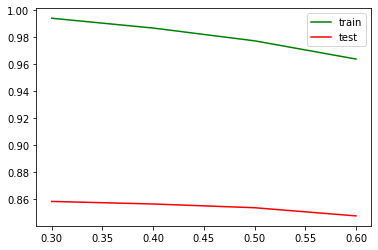

In [36]:
plot_grid_scores(grS_nusvC_optim_20, 'nu')

In [37]:
# сохранение и вывод модели
dump(grS_nusvC_optim_20, 'grS_nusvC_optim_20.joblib')
grS_nusvC_optim_20_dump = load('grS_nusvC_optim_20.joblib')
grS_nusvC_optim_20_dump

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=NuSVC(cache_size=200, class_weight='balanced', coef0=0.0,
                             decision_function_shape='ovr', degree=1,
                             gamma='auto_deprecated', kernel='rbf',
                             max_iter=500, nu=0.5, probability=False,
                             random_state=7, shrinking=True, tol=0.001,
                             verbose=False),
             iid='warn', n_jobs=-1, param_grid={'nu': (0.3, 0.4, 0.5, 0.6)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [38]:
%%time
# предсказание для модели
pred_grS_nusvC_optim_20_dump = grS_nusvC_optim_20_dump.predict(X_test_pretSVD_20)
print(metrics.classification_report(y_test_20, pred_grS_nusvC_optim_20_dump))
print(metrics.confusion_matrix(y_test_20, pred_grS_nusvC_optim_20_dump))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       135
           1       0.67      0.80      0.73       166
           2       0.81      0.78      0.79       170
           3       0.74      0.76      0.75       182
           4       0.81      0.79      0.80       183
           5       0.84      0.89      0.86       169
           6       0.79      0.85      0.82       172
           7       0.86      0.90      0.88       191
           8       0.97      0.89      0.93       198
           9       0.91      0.92      0.91       168
          10       0.95      0.91      0.93       163
          11       1.00      0.91      0.95       195
          12       0.78      0.79      0.78       177
          13       0.89      0.95      0.92       172
          14       0.96      0.89      0.92       176
          15       0.91      0.89      0.90       182
          16       0.91      0.92      0.92       173
          17       0.96    

### Вывод по результатам подбора параметров для NuSVC:

### Сравнение результатов обучения LinearSVC и NuSVC  :                    

## OneClassSVM, поиск выбросов

In [299]:
%%time
# Получение необходимой части выборки прошедшей через преобразования текста
# X = twenty_train.data
# y = twenty_train.target
# X = five_train.data
# y = five_train.target
# X = two_train.data
# y = two_train.target
# X = twenty_train.data
# y = twenty_train.target
X = six_train.data
y = six_train.target

#  six_train.data  набор five_train.data с добавленным классом -  'rec.sport.baseball' 
# 6 классов для проверки выбросов OneClassSVM:
X_train_pretSVD_6, X_test_pretSVD_6, y_train_6, y_test_6 = data_X_y(X, y)

Wall time: 35.2 s


In [300]:
OneClassSVM?

In [301]:
OneClassSVM()

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto_deprecated',
            kernel='rbf', max_iter=-1, nu=0.5, random_state=None,
            shrinking=True, tol=0.001, verbose=False)

In [171]:
oneclassSVM = OneClassSVM(degree=1, nu=0.3
                         )
onec_5 = oneclassSVM.fit(X_train_pretSVD_5)

In [302]:
# подбор параметров на 5 классах:
def plot_par_onec(param):
    error = []
    for i in param:
        onec_5 = OneClassSVM(nu=i).fit(X_train_pretSVD_5)
        pred_5 = onec_5.predict(X_train_pretSVD_6)
        n_error_pred_5 = pred_5[pred_5 == -1].size 
        error.append(n_error_pred_5)
       
    plt.plot( param, error,
          color='green', label='error'),
    plt.legend(),
    plt.show();

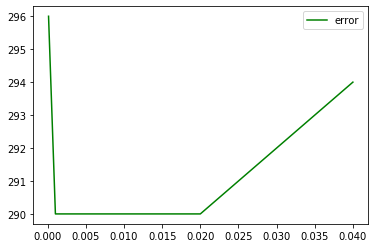

In [303]:
param = (0.0001, 0.001, 0.005, 0.01, 0.02, 0.04)
plot_par_onec(param)

In [309]:
оne_SVM = OneClassSVM(nu=0.001).fit(X_train_pretSVD_5)
# предсказание выбросов:
pred_6 = оne_SVM.predict(X_train_pretSVD_6)

In [320]:
train_6 = pred_6.copy()
train_6[:30]

array([ 1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

In [321]:
# то,что алгоритм пометил выбросом, переназачим = 0
train_6[train_6 == -1] = 0
train_6[:30]

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [312]:
# 5 - класс добавлен, его алгоритм должен распознать как выброс.
# код ниже переназначает 0-4 классам значение = 1, класс 5 = 0

y_train_6[:30]

array([3, 4, 1, 2, 4, 5, 4, 1, 1, 2, 4, 5, 4, 1, 1, 2, 3, 4, 2, 5, 0, 2,
       3, 5, 4, 1, 4, 3, 4, 3], dtype=int64)

In [328]:
test_6 = y_train_6.copy()
test_6[test_6 != 5] = 1
test_6[test_6 == 5] = 0
test_6[:30]

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

##### выбросы - миноритарный класс, использнуем roc_auc:

In [323]:

roc_auc_score(test_6, train_6)

0.47501854372274765

In [327]:
print(metrics.classification_report(test_6, train_6))
print(metrics.confusion_matrix(test_6, train_6))

              precision    recall  f1-score   support

           0       0.11      0.08      0.09       422
           1       0.82      0.87      0.85      2051

    accuracy                           0.74      2473
   macro avg       0.47      0.48      0.47      2473
weighted avg       0.70      0.74      0.72      2473

[[  32  390]
 [ 258 1793]]


##### Выводы по OneClassSVM:

# Выводы (итог):